
## MTHM008 Project 1 

700024338


# Introduction
*This project investigates two systems of ordainary differential equations (ODE) (Lotka-Volterra predator-prey model and Lorenz's 1963 system). Exact solutions of dynamical ODE's are dificult to solve, however, by using mathematical models, we can easily alter parameters and conditions in order to visualise the behaviour of such systems and understand the implications of numerical solutions.*

*The first system looks at the popular predator-prey model. In the early 1900's, Lokta and Volterra independently considered the simplified two species interaction and concluded the populations would theoretically oscillate[].  The system ignores aspects such as disease or competition so each species would control the population of the other in a cyclical manner. From approximately 50 years of detailed records of pelt by the Hudson’s Bay Company, the abundance of snowshoe hares and Canadian lynx showed nearly periodic oscillation. With the assumption that wild numbers were proportional to trapped amounts, here we use the Lokta-Volterra equations to mathematically model this data and conduct numerical analysis to examine the systems stability.*

*The Lorenz model is a simplified mathematical model for atmospheric convection and consists of three ordinary differential equations which are known as Lorenz equations. The equations were originally derived from a minimalist model of thermal convection in a box by Saltzman (1962)[] and they have further applications in studies such as modelling lasers [] and dynamos []. The Lorenz  1963 paper [] proposed to rediscover the sensitive dependence of solutions on initial conditions (later known as chaos) [] . Solutions of these ODE’s are shown by trajectories in phase space and exhibit a distinct ‘strange attractor’ pattern. The strangeness can be explained by the uniqueness theorem which means the trajectories never cross and hence create an ‘infinite complex of surfaces’ []. Setting up perturbed simulations where initial conditions vary by small amounts, the trajectories start very close together then rapidly diverge with very different future states. The implication of this is that long term prediction becomes impossible in such a system. The predictability limit is hence bounded to the instability of the atmosphere which provides an upper bound and the skill to which current operational forecasting procedures are observed creates a lower bound []. Here we will use Forward Euler and Runge-Kutta (RK4) numerical methods as well as a built in scipy integration function solve_ivp to obtain solutions for the model. We will first discuss the sensitivity of the model to initial conditions and model parameters then assess the predictability of the system using Bred Vectors. Finally, we will use the Lorenz coupled equations to model the El Niño Southern Oscillation to discuss its real world applicability.* 

# - Lotka-Volterra Model

In this section, we will:

- **Analyse the stability of equilibrium points**
- **Discretise the model using a finite difference method and understand its behaviour**
- **Investigate the differences of the model when a third species is introduced**

##  2 Species Model

We first limit our predator-prey model to a simple case with 2 species whose population's rate of growth are represented by only their individual growth/decay and their mutual interaction. The time-dependent growth of the two species are described by the system of ODE's:

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L \; ,
\end{align*}
where $H$ and $L$ represent the number of hare and lynx respectively, and $\alpha$, $\beta$, $\gamma$ and $\delta$ are positive real parameters.

Definition of parameters:

 -  $\alpha$ : Growth rate of prey in absence of predators,
 - $\beta$ : Effect of predatation on prey,
 -  $\delta$ : Efficiency and propogation rate of predator in the presence of prey,
 -  $\gamma$ : Natural death rate of predator in the absence of prey,
 
The solution to this system is continuous and deterministic. The prey (Hare) are assumed to have unlimited food supply and the only way they decline is due to predatation. Similarly, The Lynx's population is independent of more complicated dynamics such as disease, environmental change biases, genetic adaptation or competition from other predators of Hare. Their rate of growth is determined only by their natural death rate and the size of the prey's population.

Having defined our equation and discussed the assumptions of the model, we will now work out the equilibrium points of this system to investigate whether one or both species can die out if they are both non-zero at some time t.

### Finding Equilibrium Points and Analysing System's Stability 
Equilibrium points are steady states that are a constant solution to an ODE. We will find $P_{0}$ and determine whether the eqilibrium point is stable by finding eigenvalues of the Jacobian Matrix. 
 - Finding Equilibrium points\
 \
Let's set our system of ODE as:
\
\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L\ &= F(H,L) \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L\ &= G(H,L) \; ,
\end{align*}
\
From this, an equilibrium point is a point $P_{0}$ $=$ ($H_{0}$ ,$L_{0}$) for which:\
\
\begin{align*}
F (H_{0} ,L_{0}) = 0\;,\\
G (H_{0} ,L_{0}) = 0\;,
\end{align*}
\
An explicit solution is $P_{0,1}$ $=$ $(0,0)$\
Rearranging $F $ and $G$, we can find our second solution by making the values within the brackets $=0$:
\
\begin{align*}
H(\alpha - \beta L) = 0 \rightarrow \alpha - \beta L = 0\;,\\
L(\delta H - \gamma) = 0 \rightarrow \delta H - \gamma = 0 \;,
\end{align*}
\
Hence, $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ is also a solution.

 - Test the local stability at each fixed point\
 \
The system's stability is interpreted by linearising the non-linear system near an equilibrium. This perturbation will allow us to understand the behaviour of the system local to these points such as if it were to move away or remain at a steady state.\
\
We set our perturbed points to be: H(t) = $H_{0}$ + $\theta$ and L(t) = $L_{0}$ + $\phi$, where $\theta$ and $\phi$ are small perturbations from a fixed point. Linearising F and G about these points usinf Taylor expansion, we have:\
\
\begin{align*}
\frac{\partial \theta}{\partial t} &= F(H_{0} + \theta,L_{0} + \phi) ,\\
&= F(H_{0} ,L_{0}) + \theta \displaystyle \Bigg[ \frac{\partial F}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial F}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ... \; ,\\
&= \theta \displaystyle \Bigg[ \frac{\partial F}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial F}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ...
\\
\\
\frac{\partial \phi}{\partial t} &= G(H_{0} + \theta,L_{0} + \phi),\\
&= G(H_{0} ,L_{0}) + \theta \displaystyle \Bigg[ \frac{\partial G}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial G}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ... \; ,\\
&= \theta \displaystyle \Bigg[ \frac{\partial G}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial G}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ...\\
\\
\end{align*}
\
Higher-order terms in the taylor series for perturbations, $\theta$ & $\phi$ that are close to 0, can be neglected. This system of perturbation ODE can be written as a Jacobian Matrix, $\boldsymbol A$ :\
\
\begin{align*}
\boldsymbol{u} &= \begin{bmatrix} \theta \\ \phi \end{bmatrix} \; ,\\
\\
\frac{\partial \boldsymbol{u}}{\partial t} &= \begin{bmatrix} \displaystyle \Bigg( \frac{\partial F}{\partial H}\Bigg)_{(H_{0} ,L_{0})}& \displaystyle \Bigg( \frac{\partial F}{\partial L}\Bigg)_{(H_{0} ,L_{0})} \\ \displaystyle \Bigg( \frac{\partial G}{\partial H}\Bigg)_{(H_{0} ,L_{0})}&\displaystyle \Bigg( \frac{\partial G}{\partial L}\Bigg)_{(H_{0} ,L_{0})} \end{bmatrix} \cdot \boldsymbol{u} \; ,\\
&= \boldsymbol {A} \boldsymbol{u}\\
\\
\end{align*}
\
Hence, by finding the partial derivatives of functions $F(H,L)$ and $G(H,L)$ , we have:\
\
\begin{align*}
\boldsymbol {A} &= \begin{bmatrix} \alpha - \beta L & - \beta H \\ \delta L & \delta H - \gamma \end{bmatrix}
\end{align*} \
From the eigenvalue equation , $\boldsymbol{A}$ $\boldsymbol{x}$ = $\lambda$ $\boldsymbol{x}$ , eigenvalues ,$\lambda$ , are found to be the roots of the polynomial that forms when evaluating the characteristic equation at $P_{0,1}$ & $P_{0,2}$ which is:\
\
\begin{align*}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = 0 ,  \quad \boldsymbol{I}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{align*} 
    - at $P_{0,1}$ $=(0,0)$:\
\begin{align}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = det \begin{bmatrix} \alpha - \lambda & 0 \\ 0 & - \gamma - \lambda \end{bmatrix} 
&= (\alpha - \lambda) \cdot (- \gamma - \lambda ) = 0 ,\\
\end{align}
\
Eigenvalues $\rightarrow  \lambda_{1} = \alpha , \lambda_{2} = - \gamma$ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{R}$\
$\lambda_{1} > 0 , \lambda_{2} < 0 $ \
\
The eigenvalues are real and of opposite signs which result into an **unstable** saddle point
    - at $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$:\
\begin{align}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = det \begin{bmatrix} 0 - \lambda & - \frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 - \lambda \end{bmatrix}
= (- \lambda) \cdot ( - \lambda ) - (- \frac{\beta \gamma}{\delta}) \cdot (\frac{\delta \alpha}{\beta}) ,
&= \lambda^{2} + \gamma \alpha  =0
\end{align}  
\
Eigenvalues $\rightarrow  \lambda_{1} = \sqrt{\gamma \alpha}$ $\boldsymbol{i}$ , $\lambda_{2} = - \sqrt{\gamma \alpha}$ $\boldsymbol{i} $ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{C}$\
$\lambda_{1}$ & $\lambda_{2}$ are complex conjugates \
\
The eigenvalues are complex conjugates with no real values which result into an **stable** cyclical oscillation.

We will now integrate the ODE by discretising the model in order find solutions and confirm the stability of the model at each equilibrium point.

## Discretising the Model and Understanding its Behaviour

Another method to find an approximate solution for a system of differntial equations is by using a finite difference method, more specifically the Forward Euler method.

Given an ODE of the form 

\begin{equation}
\frac{d{\bf{y}}}{dt} = {\bf{f}}({\bf{y}}), \quad t\ge t_0, \quad {\bf{y}}(t_0)={\bf{y}}_0
\end{equation}

The domain is first discretised into a finite number of points that are evenly distributed: $t_1, t_2, ..., t_n$.

Integrating the ODE between $t_i$ and $t_{i+1}$ gives
\begin{align}
{\bf{y}}(t_{i+1}) &= {\bf{y}}(t_i) + \int_{t_i}^{t_{i+1}}{\bf{f}}({\bf{y}}(\tau)) d\tau \\
&\approx {\bf{y}}(t_i) + (t_{i+1}-t_i){\bf{f}}({\bf{y}}_i) \\
&= {\bf{y}}(t_i) + \Delta t{\bf{f}}({\bf{y}}_i)
\end{align}
where $\Delta t$ is the (constant) distance between $t_i$ and $t_{i+1}$.

For the Lokta-Volterra equations,

\begin{equation}
\frac{d{\bf{H}}}{dt} = {\bf{f}}({\bf{H,L}}), \quad t\ge t_0, \quad {\bf{H}}(t_0)={\bf{H}}_0\\
\frac{d{\bf{L}}}{dt} = {\bf{g}}({\bf{H,L}}), \quad t\ge t_0, \quad {\bf{G}}(t_0)={\bf{G}}_0,
\end{equation}
\
\begin{align}
{\bf{H}}(t_{i+1}) &= {\bf{H}}(t_i) + \Delta t{\bf{f}}({\bf{H}}_i,{\bf{L}}_i)\\
{\bf{L}}(t_{i+1}) &= {\bf{L}}(t_i) + \Delta t{\bf{g}}({\bf{H}}_i,{\bf{L}}_i)
\end{align}

This solution approximates the model to be piecewise linear so it is clear that the smaller the domain is discretised the closer our approximation will be to the true analytical solution.

We will now formulate a recursive algorithm that is applied to the Lokta-Volterra model.  The method for this will be to:

1. initialise H, L, the model parameters $\alpha$, $\beta$, $\gamma$ and $\delta$, the start time $t_0$, the timestep $\Delta t$ and an end time $t_{max}$

2. write a loop to update the values according to:
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}

3. plot the data

Text(0.5, 1.0, 'Phase Diagram')

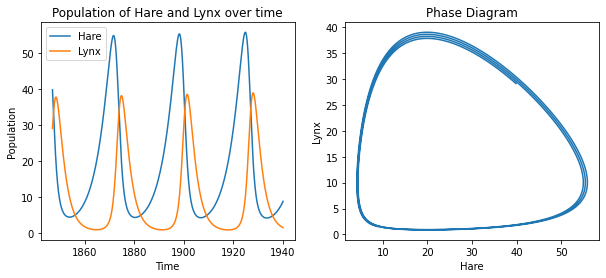

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from cw1_functions import *
'''
forward_euler2 function returns np.array of (hare, lynx, time) data and can be called 
as x[0], x[1], x[2] repectively when x=forward_euler2(...).

    Parameters for the model - a,b,d,g are aplha, beta, delta, gamma respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
'''
#Set model parameters, timestep, run-time and initial population of both species 
x1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#Plotting the time evolution of hare and lynx populations using forward Euler method.
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes2[0].plot(x1[2], x1[0], label ='Hare')
axes2[0].plot(x1[2], x1[1], label = 'Lynx')
axes2[1].plot(x1[0], x1[1])
axes2[0].set_xlabel('Time')
axes2[0].set_ylabel('Population')
axes2[1].set_xlabel('Hare')
axes2[1].set_ylabel('Lynx')
axes2[0].legend()
axes2[0].set_title('Population of Hare and Lynx over time')
axes2[1].set_title('Phase Diagram')


Periodic behavior similar to that observed in records of pelt by the Hudson’s Bay Company is found both the phase diagram and the species' population evolution (on the above right and left plots respectively) by using the Forward Euler numerical method. Growth in Hare population increases the efficiency and propogation in prey which in turn reduces the Hare population. The decline in hare population is followed by a fall in Lynx abundance as their food source becomes more scarce which ultimately allows for increased propogation of Hare. This numerical method is showing behaviour of a slight overal growth trajectory for both species' population rather than a complete cyclical relationship. How accurate is this method of integration? Should we use another method to correct this? Let's explore varying the timesteps of the model to understand the method's accuracy and pick suitable values for $\Delta t$ . Later on, we will look at another method which may improve the model.


### Varying Timesteps

Timesteps determine the extent of discretisation. Forward Euler method approximates a continuous integration into discrete terms from a Taylor expansion therefore, varying the timestep should affect the accuracy of the approximation.

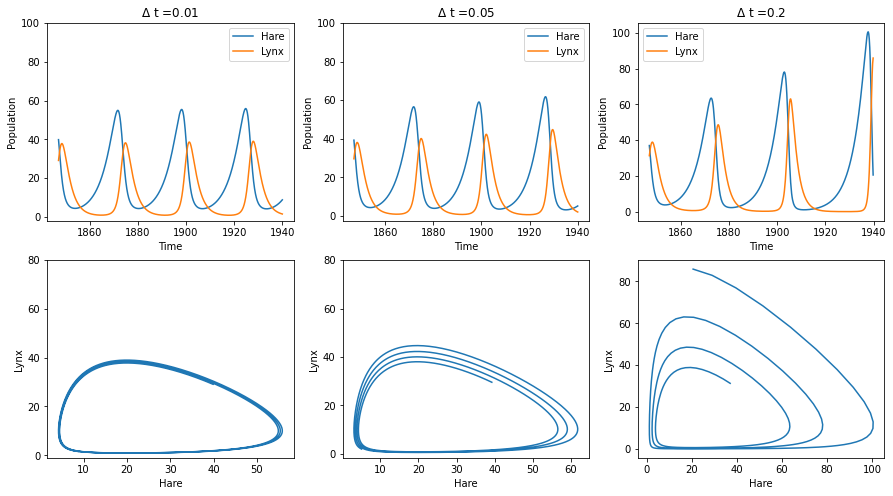

In [3]:
fig1, axes1 = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # defining the figure and subplots
cols1=[0.01,0.05,0.2]
for i, ax in zip(cols1, axes1[0]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=i,Hi=40,Li=29)
    ax.plot(a[2],a[0], label = 'Hare')
    ax.plot(a[2],a[1], label = 'Lynx')
    ax.set_yticks(np.arange(0,120,20))
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
    ax.set_title('$\Delta$ t ='+ str(i) )
for i, ax in zip(cols1, axes1[1]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=i,Hi=40,Li=29)
    ax.plot(a[0],a[1])
    ax.set_yticks(np.arange(0,100,20))
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    
    

The top three plots show the time evolution of the population of Hare and Lynx and the bottom three are phase plots of the respective evolution shown. $\Delta t$ are chosen to be 0.01, 0.05 and 0.2.
These plots show the Forward Euler method to be sensitive to the timesteps we choose. Increasing the timesteps lead to a gradual population increase for both species moving further away from periodic behaviour. Keeping the timesteps relatively small (e.g. 0.01 years) in the the Forward Euler method approximates the Lokta-Voltera equations far better than for larger timesteps. We expect this to be the case as the more we discretise the model, the closer our solution will be to the continuous form. Making it extremely small will be a large computational cost so $\Delta t$ = 0.01 looks to be sufficient to appropriately show cyclical behaviour in the run time we have chosen.

Having chosen  $\Delta t$ , lets look at the effects of varying model parameters.

### Varying Model Parameters

Here we plot the phase diagrams of varying parameters $\alpha , \beta, \delta, \gamma$ and discuss their physical meaning.

In [4]:
#varying alpha
a1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
a2=forward_euler2(a=0.4,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
a3=forward_euler2(a=0.6,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#varying beta
b1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
b2=forward_euler2(a=0.2,b=0.04,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
b3=forward_euler2(a=0.2,b=0.08,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#varying delta
d1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
d2=forward_euler2(a=0.2,b=0.02,d=0.04,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
d3=forward_euler2(a=0.2,b=0.02,d=0.06,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#varying gamma
g1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
g2=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.6,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
g3=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.8,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#storing data in a list 
v_a=[a1,a2,a3]
v_b=[b1,b2,b3]
v_d=[d1,d2,d3]
v_g=[g1,g2,g3]

#setting labels for the legend
l_a=[r'$\alpha$ =0.1',r'$\alpha$=0.2',r'$\alpha$=0.4']
l_b=[r'$\beta$=0.02',r'$\beta$=0.04',r'$\beta$=0.08']
l_d=[r'$\delta$=0.02',r'$\delta$=0.04',r'$\delta$=0.06']
l_g=[r'$\gamma$=0.4',r'$\gamma$=0.6',r'$\gamma$=0.8']


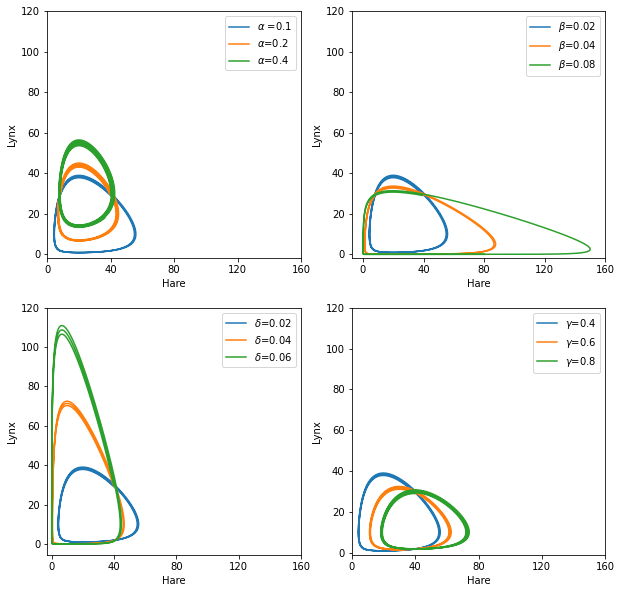

In [5]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
cols1 = [v_a,v_b,v_d,v_g]
labels = [l_a,l_b,l_d,l_g]
for col, ax, l in zip(cols1, axes1,labels):
    ax.plot(col[0][0],col[0][1], label = l[0])
    ax.plot(col[1][0],col[1][1], label = l[1])
    ax.plot(col[2][0],col[2][1], label = l[2])
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    ax.set_xticks(range(0,180,40))
    ax.set_yticks(range(0,140,20))
    ax.legend()


These figures show phase plots of Hare and Lynx populations when model parameters are changed independently. For example, the top left subfigure shows phase plots where $\alpha$ varies but all other parmeters remain the same. Additionaly, the blue line is the same for all four plots and is used as a reference state to allow comparison between parameters. Varying any of the model parameters will change the non-zero equilibrium point for all the phase plots in each graph since $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. This point of stability is highly sensitive as you can see from the dramatic increase in both Hare and Lynx populations in the top right and bottom left plots respectively. 

The dramatic increase in Hare population when the rate of predatation of Hare, $\beta$, is increased can be explained by the consequential amplified effect of food scarcity for Lynx. Too much predatation can leave less food for Lynx at a given time so the population starts to decline and stabalise at a lower maximum population than can be seen in the reference state. This also satisfies the condition that the equilibrium of the model has the property that the Hare's equilibrium is given by the Lynx's prameters $(\frac{\gamma}{\delta})$ and vice versa. The Lynx's equilibrium density, $(\frac{\alpha}{\beta})$, is decreased and the recovery of lynx population is stunted. This allows for a huge increase in hare population. Similarly, in the top left subplot, increasing the growth rate of Hare, $\alpha$, increases the Lynx's equilibrium point and so the population stabalises at a higher value. A physical explanation for this could be that the faster replenishment of food source has overall increased abundance of Lynx which in turn has decreased the maximum population of Hare. This effect is popularly known as the Rosenzweig's paradox of enrichment[]. Pardox is used to express the contradictory role of enrichment in ecosystems such that the percieved beneficial enrichment for the growth of a population might have the potential to destabalise the ecosystem[]. The contradictory effect of the maximum Lynx population increasing and the maximum Hare population decreasing when increasing $\alpha$ shows that the percieved beneficial effect is not occuring.

Both the top right and bottom left subplots show an unphysical situation where the abundance of animals are kept close to zero which would, in reality, lead to extinction. The Lokta-Volterra equations allow for population cycles to grow out of populations which are << 1 (but always greater than 0). For these equations to be used effectively, models should be limited to parameters that do not allow the population of either to go below, at the very least, 2. This shows that varying parameters of the model such that we enrich of the effect of predatation on prey and the efficiency and propogation rate of the predator has lead to a destruction in the steady state.  

Increasing the 'death rate' of Lynx, $\gamma$, the environment becomes better for Hare to repopulate consequently shifting the equilibrum density of Hare to be higher than that in the refrence cycle as seen in the bottom right plot. This has also reduced the maximum Lynx population which shows that the death rate has a direct effect on the abundance of lynx aswell. The bottom left subplot shows that by increasing the efficiency and propogation rate of the predator in the presence of prey ,$\delta$, the maximum population of Lynx is dramatically increased while the Hare's maximum is decreased. As expected in the equilibrum density of Hare, the equilibrium shifts to a lower value when $\delta$ is increased. 

Varying model parmeters has been shown to directly influence the equilibrium point of the system so let's now look closer at these points. 


### Eigenvalue Analysis

From the above calculations of eigenvalues; 
   - at $P_{0,1}$ $=(0,0)$:\
\
$ \lambda_{1} = \alpha , \lambda_{2} = - \gamma$ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{R}$\
$\lambda_{1} > 0 , \lambda_{2} < 0 $ \
\
The eigenvalues are real and of opposite signs which result into an **unstable** saddle point,


   - at $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$:\
\
$ \lambda_{1} = \sqrt{\gamma \alpha}$ $\boldsymbol{i}$ , $\lambda_{2} = - \sqrt{\gamma \alpha}$ $\boldsymbol{i} $ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{C}$\
$\lambda_{1}$ & $\lambda_{2}$ are complex conjugates \
\
The eigenvalues are complex conjugates with no real values which result into an **stable** cyclical oscillation.

We will now plot phase diagrams and population evolutions for initial populations set to values around these equilibrium points in order to visualise their respective stability.


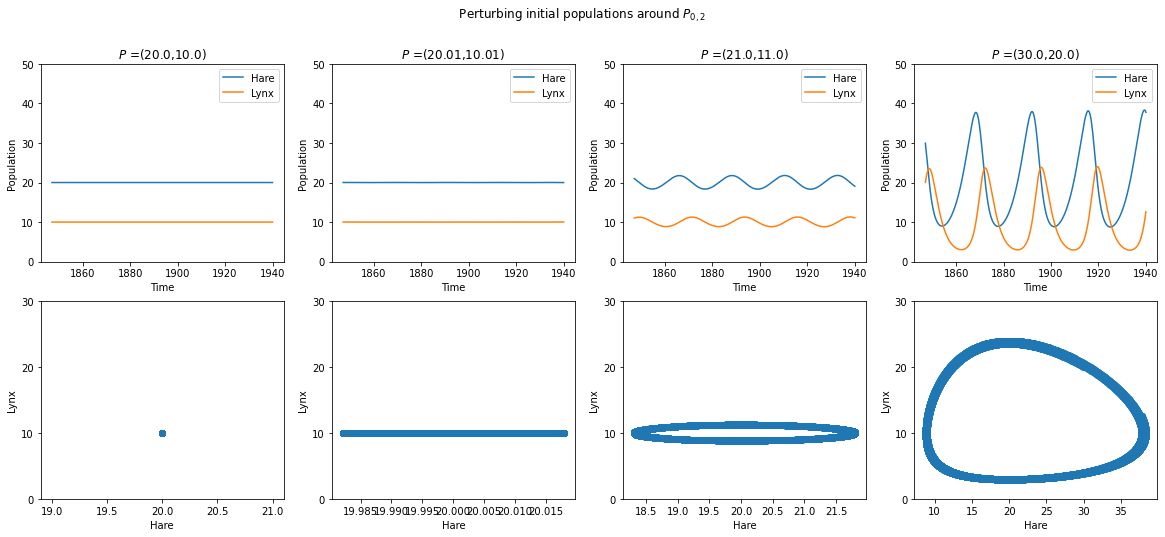

In [6]:
fig1, axes1 = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))  # defining the figure and subplots
fig1.suptitle(' Perturbing initial populations around $P_{0,2}$ ')

# a=alpha=0.2 , b=beta=0.02 , d=delta=0.02 , g=gamma=0.4
#cols1=[a/b,(a/b)+0.01,(a/b)+1,(a/b)+10] : Lynx population
#cols2=[g/d,(g/d)+0.01,(g/d)+1,(g/d)+10] : Hare population

cols1=[0.2/0.02,(0.2/0.02)+0.01,(0.2/0.02)+1,(0.2/0.02)+10]
cols2=[0.4/0.02,0.4/0.02+0.01,0.4/0.02+1,0.4/0.02+10]
for i,j,ax in zip(cols1, cols2, axes1[0]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=j,Li=i)
    ax.plot(a[2],a[0], label = 'Hare')
    ax.plot(a[2],a[1], label = 'Lynx')
    ax.set_yticks(np.arange(0,60,10))
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
    ax.set_title('$P$ ='+ '(' +str(j)+','+str(i) +')' )
for i,j, ax in zip(cols1, cols2, axes1[1]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=j,Li=i)
    ax.scatter(a[0],a[1])
    ax.set_yticks(np.arange(0,40,10))
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')


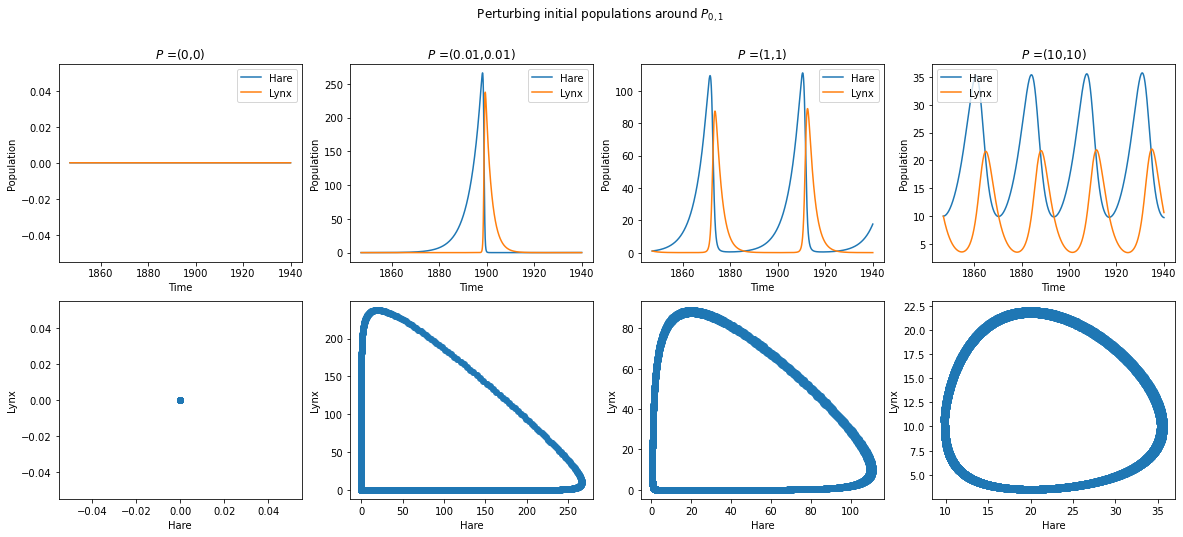

In [7]:
fig2, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))  # defining the figure and subplots
fig2.suptitle(' Perturbing initial populations around $P_{0,1}$')
#cols2 : Hare and Lynx population values
cols2=[0,0.01,1,10]
for i, ax in zip(cols2, axes2[0]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=i,Li=i)
    ax.plot(a[2],a[0], label = 'Hare')
    ax.plot(a[2],a[1], label = 'Lynx')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
    ax.set_title('$P$ ='+ '(' +str(i)+','+str(i) +')' )
for i, ax in zip(cols2, axes2[1]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=i,Li=i)
    ax.scatter(a[0],a[1])
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')


The above two figures showing the behaviour of the model when initial populations are perturbed. Each column is titled with the initial population of Hare($H$) and Lynx($L$), where $P = (H,L)$ and their respective population evolution and phase diagrams are shown below in the stated order. 

Focussing first on the phase plots of the equilibrium points ($P=(0,0)$ and $P=(20,10)$), it is visibly clear that conditions satisfying these values will remain constant throughout time. 

Perturbing the initial populations around $P_{0,1}$ illustrates an important disadvantage to using this model. The prey population are seen to 'bounce-back' even when they start at very low numbers. The saddle point, as seen in the eignevalue calculations, makes it extremely difficult for the model to reach a population of zero and so values very close to 0 are seen to grow. The unstability is also highlighted by the fact populations reach values of ~ 200 when $P=(0.01,0.01)$. 

As we get further away from the equilibrium points , the model stabalises to a more realistic cycle. The stable equilibrium point is clearly demonstrated by the little variation in population numbers when perturbing $P_{0,2}$ by 0.01 and 1. The perturbation of this stable equilibrium point is seen to vary the population by less than 5. 

Another intersting behaviour of the model can be seen when we plot phase diagrams of populations much larger than $P_{0,2}$. We will plot this below.

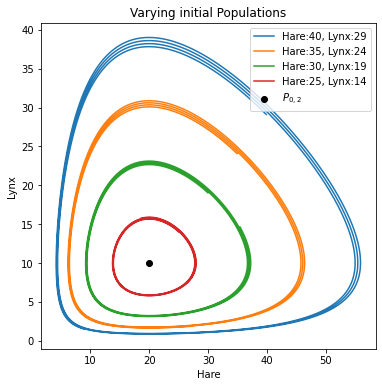

In [8]:
fig2, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(0.4/0.02,0.2/0.02 , label =r'$P_{0,2}$', color='black')
cols1=[40,35,30,25]
cols2=[29,24,19,14]
labels =['Hare:40, Lynx:29','Hare:35, Lynx:24','Hare:30, Lynx:19','Hare:25, Lynx:14']
for i,j, k in zip(cols2, cols1,labels):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=j,Li=i)
    ax.plot(a[0],a[1], label = k)
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    ax.legend()
    ax.set_title('Varying initial Populations')

Model parameters are all kept the same and only Hare and Lynx initial populations are changed. The curves of each cycle all encircle the non-zero equilibrium point $P_{0,2}$ and evidently decrease in radius as initial populations of each species gets closer to the equilibrium point. Conclusively, we have also now shown that regardless of varying model parameters or initial conditions, the model always shows periodicity. This is furthermore supported analytically by the saddle point defined at $P=(0,0)$.

Assuming the discretisation tends to infinity, the model we have defined using the Forward Euler method is approximated to show periodicity. The gradual increase in both population is still evident in our defined $\Delta t$ so can we modify this method to be completely periodic with the same discretisation? 

### Modified Euler method

In the Forward Euler method, ${\bf{L}}(t_{i+1})$ is evaluated using ${\bf{H}}(t_{i})$. The Modified Euler approach uses a better estimate of ${\bf{H}}(t_{i+1})$ to evaluate ${\bf{L}}(t_{i+1})$. The method of integrating the Lokta-Volterra equations now become:

\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_{i+1} L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}


This can be clearly seen when plotting the corresponding phase diagrams of the Lokta-Volterra equations given the exact same initial conditions and parameters. 

Text(0.5, 1.0, 'Forward Euler')

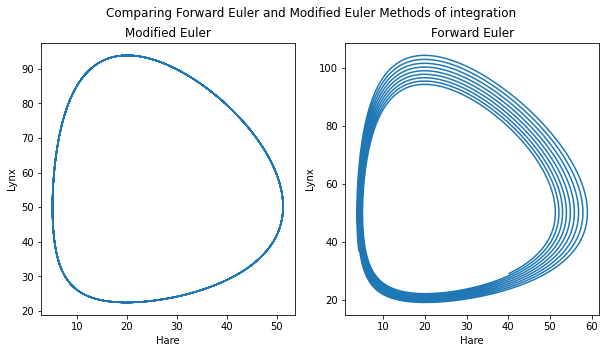

In [9]:
'''
modforward_euler2 function returns np.array of (hare, lynx, time) data and can be called 
as x[0], x[1], x[2] repectively when x=modforward_euler2(...).

    Parameters for the model - a,b,d,g are aplha, beta, delta, gamma respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
'''
x1=modforward_euler2(a=1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x2=forward_euler2(a=1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#Plotting the time evolution of hare and lynx populations and phase diagrams.
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig2.suptitle('Comparing Forward Euler and Modified Euler Methods of integration')
axes2[0].plot(x1[0],x1[1])
axes2[0].set_xlabel('Hare')
axes2[1].set_xlabel('Hare')
axes2[0].set_ylabel('Lynx')
axes2[1].set_ylabel('Lynx')
axes2[1].plot(x2[0],x2[1])
axes2[0].set_title('Modified Euler')
axes2[1].set_title('Forward Euler')

It was previously discussed that reducing the discretisation would reduce the error that comes from using the Forward Euler method. In most numerical applications, this reduction would come at an expensive computational cost. Additionally, at sufficiently small timesteps over a large number of timesteps, the error from estimating the solution from a tangent to the function starts to accumulate and the numerical estimate diverges from the true analytical solution.

In the above figure, the subplot on the left uses the Modified Euler method and the subplot on the right shows the Forward Euler method. As seen in the conditions defined in the python function ` modforward_euler2 ` and `forward_euler2`, the timestep `Del_t` is set to the same value. Just by using an algorithm which takes a better estimate of the Hare population at a given time, the error of using the Forward Euler approach is reduced/completely removed without making it more computationally expensive. This modified method produces a solution much closer to the exact solution to the Lokta-Volterra equations which is completely periodic.


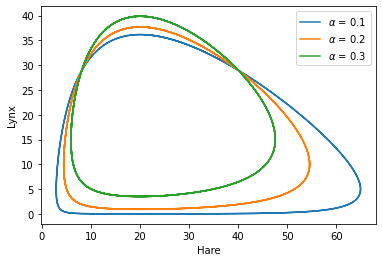

In [10]:
x1=modforward_euler2(a=0.1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x2=modforward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x3=modforward_euler2(a=0.3,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

plt.plot(x1[0],x1[1], label = r'$\alpha$ = 0.1')
plt.plot(x2[0],x2[1], label = r'$\alpha$ = 0.2')
plt.plot(x3[0],x3[1], label = r'$\alpha$ = 0.3')
plt.xlabel('Hare')
plt.ylabel('Lynx')
plt.legend()

From the plot above, we can also conclude that varying parameters would not affect the periodicity of the solution. 

##  3 Species Model

We will now add a third species into our model - Wolves. This model remains to be linear where Hare are eaten by Lynx and Wolves exclusively prey upon Lynx. The system of ODE's now becomes:

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= +\delta H L - \gamma L - \epsilon L W \; ,\\
\frac{\mathrm{d} W}{\mathrm{d} t} &= -\eta W + \rho L W \; ,
\end{align*}
\
where $H$, $L$ and $W$ represent the number of hare, lynx and wolf respectively, and $\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$, $\eta$ and $\rho$ are positive real parameters.

$\alpha$, $\beta$, $\gamma$, $\delta$ are the same as defined in the 2 species model and relate to dependent and independent the rates of growth and decline of Hare and Lynx. 

Additional model parameters[]:
- $\epsilon$: The effect of predatation on Lynx by Wolves,
- $\eta$: Natural death rate of Wolves in the absence of Lynx, 
- $\rho$: Efficiency and propogation rate of Wolves in the presence of Lynx,

Just by looking at the terms in the ODE, it is evident that if we set our initial population of Wolves to be 0 we return exacly the 2 species Lokta-Volterra equations. 

Initialising the same conditions for Lynx, the model would now only have terms that relate to the exponential growth of Hare and the exponential decrease of Wolves since the Lynx no longer reduce the population of Hare or provide nutriment for the Wolves.

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H \; ,\\
\frac{\mathrm{d} W}{\mathrm{d} t} &= -\eta W \; ,
\end{align*}

Finally, starting with 0 Hare, the system will eventually tend to extinction as the Lynx have no food to sustain any population and the Wolves exhaust their food supply of Lynx.

Our analysis of the systems behaviour will now be investigated by implementing the Forward Euler method described above. The population of each species will therefore be updated using:

\begin{align}
\\
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i - \epsilon L_i W_i) \\
  W_{i+1} &= W_i + \Delta t (-\eta W_i + \rho L_i W_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}

Let's look at the species evolution in time when:
 $\alpha$ = 0.1,
 $\beta$ = 0.02,
 $\gamma$ = 0.1,
 $\delta$ = 0.02,
 $\epsilon$ = 0.02,
 $\eta$ = 0.1,
 $\rho$ = 0.02.

Text(0, 0.5, 'Population')

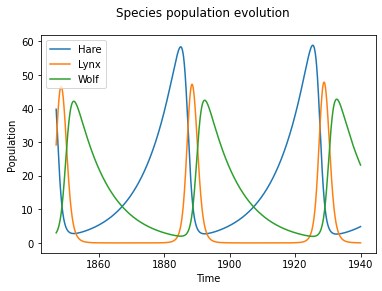

In [11]:
'''
forward_euler3 function returns np.array of (hare, lynx, wolf, time) data and can be called 
as x[0], x[1], x[2], x[3] repectively when x=forward_euler3(...).

    Parameters for the model - a,b,d,g,ep,et,r are aplha, beta, delta, gamma, epsilon, eta,rho respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
    Wi: initial wolf population
'''
 
y=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

#Plotting the time evolution of hare and lynx populations using forward Euler method.
plt.plot(y[3], y[0], label ='Hare')
plt.plot(y[3], y[1], label ='Lynx')
plt.plot(y[3], y[2], label ='Wolf')
plt.legend()
plt.suptitle('Species population evolution')
plt.xlabel('Time')
plt.ylabel('Population')

These parameters were chosen to minimise each species' population reaching values much less than one. The model is still not perfect as the Lynx population is seen to 'bounce-back' every ~20 years however, Hare and Wolf populations are remaining further away from biological extinction values. A similar trend to the Lokta-Volterra 2 species model is shown such that, the increase in Hare triggers an increase in Lynx which now also triggers an increase in Wolf numbers. The increasing predatation, as numbers of predators increase, is closely followed by a decline in prey numbers and therefore creates a '*nearly invarient*' cycle.

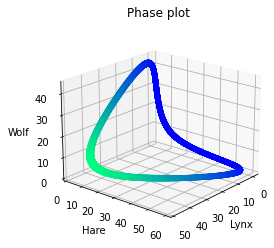

In [12]:
axes22 = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = y[2]
xdata = y[1]
ydata = y[0]
axes22.scatter3D(xdata, ydata, zdata, c=xdata, cmap='winter')
axes22.set_xlabel('Lynx')
axes22.set_ylabel('Hare')
axes22.set_zlabel('Wolf')
axes22.set_title('Phase plot')
axes22.view_init(elev=20, azim=40);

This plot in phase space shows the 'periodical' behaviour of the system as a 'closed loop' forms. The blue to green gradient represents the value of Lynx as it varies from low to high population numbers. These parameters are set to be a reference state to which we will compare plots of varying parmeter values.

### Varying Model Parameters

We will first investigate the effect of doubling some chosen parameters from their reference 'stable' state. 

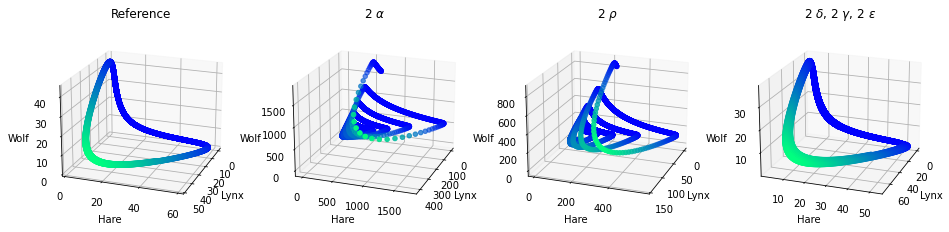

In [13]:
#reference
y1=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double alpha
y2=forward_euler3(a=0.2,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double rho
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.04,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double delta, gamma and epsilon
y4=forward_euler3(a=0.1,b=0.02,d=0.04,g=0.2,ep=0.04,et=0.1,r=0.02,t=1847,t_max=2040,Del_t=0.01,Hi=40,Li=29,Wi=3 )

col=[y1,y2,y3,y4]
loc=[1,2,3,4]
label=['Reference',r'2 $\alpha$ ', r'2 $\rho$ ', r'2 $\delta$, 2 $\gamma$, 2 $\epsilon$ ']
fig = plt.figure(figsize=plt.figaspect(.25))
for i,j,k in zip(col,loc,label):
    ax1 = fig.add_subplot(1,4, j,projection='3d')
    zdata = i[2]
    xdata = i[1]
    ydata = i[0]
    ax1.scatter3D(xdata, ydata, zdata, c=xdata, cmap='winter')
    ax1.set_title(k)
    ax1.set_xlabel('Lynx')
    ax1.set_ylabel('Hare')
    ax1.set_zlabel('Wolf')
    ax1.view_init(elev=20, azim=20);

The middle two phase diagrams above show the substantial effect of increasing $\alpha$ and $\rho$ independently. Comparitively, as seen in the far right plot, not much happens after we double $\delta$,$\gamma$ and $\epsilon$ all at the same time. It is also the case that these three model parameters are all related to the Lynx's rate of change with respect to time. This shows that varying the Hare or Wolf parameters have a far bigger impact on the stability of the system and hence we want to understand why this would be the case. A 2002 study of 3 Species Lokta-Volterra[] investigated in detail the behaviour of varying these parameters, in particular , the case where $\eta \beta < \rho \alpha $ and $\eta \beta > \rho \alpha $. The study concludes that the relation of these 4 parameters solely determines the long-term persistance of the top predator and that the parameters directly related to the mid-level species (Lynx in this case) has no effect on whether the top predator becomes extinct or not. 

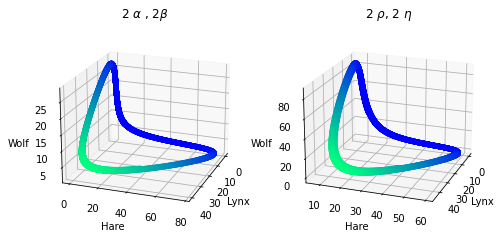

In [14]:
#double rho and eta
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.2,r=0.04,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double alpha and beta
y2=forward_euler3(a=0.2,b=0.04,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
col=[y2,y3]
loc=[1,2]
label=[r'2 $\alpha$ , 2$\beta$', r'2 $\rho$, 2 $\eta$ ']
fig = plt.figure(figsize=plt.figaspect(.5))
for i,j,k in zip(col,loc,label):
    ax1 = fig.add_subplot(1, 2, j,projection='3d')
    zdata = i[2]
    xdata = i[1]
    ydata = i[0]
    ax1.scatter3D(xdata, ydata, zdata, c=xdata, cmap='winter')
    ax1.set_title(k)
    ax1.set_xlabel('Lynx')
    ax1.set_ylabel('Hare')
    ax1.set_zlabel('Wolf')
    ax1.view_init(elev=20, azim=20);

If both $\alpha$ and $\beta$ (or $\rho$ and $\eta$) are scaled by a factor of 2, the system returns to a stable state as seen in the above figure. The combined scaling of the respective pairs of parameters further demonstrates that systems with $\eta \beta = \rho \alpha$ must represent an invarient surface as found in the study's[] figure 5. Another example of this was the reference state we have defined.  

We will now investigate the case where $\eta \beta > \rho \alpha$ and $\eta \beta < \rho \alpha$ to verify the findings of the study in our model.

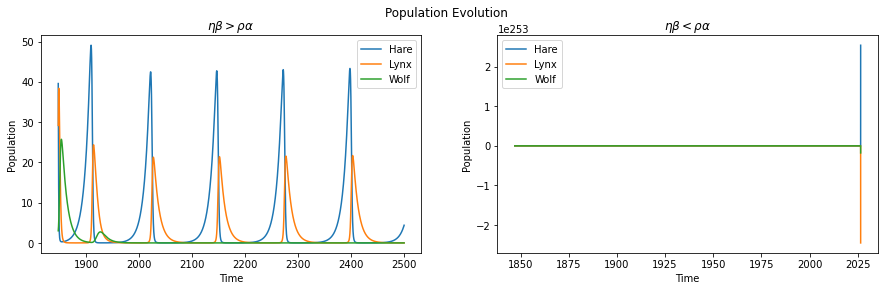

In [15]:
#longer time forecast of eta*beta > alpha*rho
y2=forward_euler3(a=0.1,b=0.04,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2500,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#longer time forecast of eta*beta < alpha*rho
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.04,t=1847,t_max=2500,Del_t=0.01,Hi=40,Li=29,Wi=3 )

fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))  # defining the figure and subplots
fig1.suptitle('Population Evolution')
axes1 = axes1.ravel()  # array to 1D
three_mod_comp =[y2,y3] 
title=[r'$\eta \beta > \rho \alpha$ ', r'$\eta \beta < \rho \alpha $']
for col, ax, k in zip(three_mod_comp, axes1, title):
    ax.plot(col[3],col[0],label ='Hare')
    ax.plot(col[3],col[1],label ='Lynx')
    ax.plot(col[3],col[2],label ='Wolf')
    ax.legend()
    ax.set_title(k)
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')  

In the above figure, the two subplots show the long-range evolution of the population of each species. The left subplot is the same as in the case for doubling $\beta$ in the reference state such that $\eta \beta > \rho \alpha$ is satisfied.  The right subplot is the same as in the case for doubling $\rho$ in the reference state such that $\eta \beta < \rho \alpha$ is satisfied. The left plot shows that the Wolf tends to extinction after roughly 60 years leaving the Hare and Lynx to continue oscillating as in the 2 species model. Biologically, this shows the proportionally larger natural death rate of Wolves in the absence of Lynx, $\eta$, and the rate of predatation of Hare by Lynx, $\beta$, has a hindering effect to the long-term persistance of the Wolf. The right subplot shows that running the system where $\eta \beta < \rho \alpha$ for the same length of time has exploded in value in just ~200 years. Let's have a closer look at the trend before this massive increase.

Text(0, 0.5, 'Population')

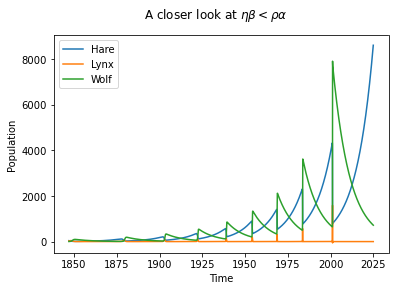

In [16]:
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.04,t=1847,t_max=2025,Del_t=0.01,Hi=40,Li=29,Wi=3 )

plt.plot(y3[3], y3[0], label ='Hare')
plt.plot(y3[3], y3[1], label ='Lynx')
plt.plot(y3[3], y3[2], label ='Wolf')
plt.legend()
plt.suptitle('A closer look at'+' '+r'$\eta \beta < \rho \alpha $')
plt.xlabel('Time')
plt.ylabel('Population')

Here, we can see a much clearer trend of the dramatic escalation of Hare and Wolf populations. The 'bounce-back' of lynx population is still evident however, their numbers do not grow by rates anywhere as close to that of Hare and Wolf. The rate of Hare growth in the absence of Lynx, $\alpha$ and the propogation rate of Wolves in the presence of Lynx, $\rho$, have the most impact in the growth of the system. Beyond this time, population values are firstly, to big to compute and secondly, incredibly unphysical to even consider. This figure and the previous left subplot of $\eta \beta > \rho \alpha$, verify our model to the similar trends seen in the study's Figures 11 and 12. It is also important to note that the model does not allow for the Lynx species to go extinct if Hare still persists. 

### Modified Euler Method - 3 species

We mentioned before that the Forward Euler method has created a '*nearly invarient*' cycle. The overal system is still shown to grow as time increases. By plotting a longer range forecast of population evolution we will first identify the growth in this approach and also compare it to solutions produced from a Modified Euler method in the same timespan. As described in the 2 Species, the Modified Euler method will use the prey's population value from $t=i+1$ in order to approximate its own population at that time. This means we will update out population values by :

\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_{i+1} L_i - \gamma L_i - \epsilon L_i W_i) \\
  W_{i+1} &= W_i + \Delta t (-\eta W_i + \rho L_{i+1} W_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}


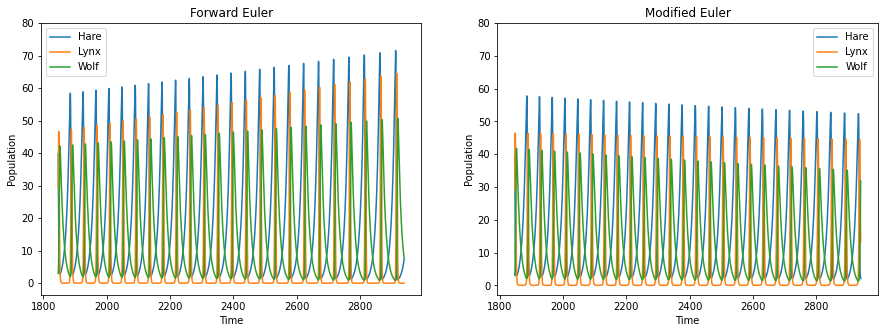

In [17]:
'''
modforward_euler3 function returns np.array of (hare, lynx, wolf, time) data and can be called 
as x[0], x[1], x[2], x[3] repectively when x=forward_euler3(...).

    Parameters for the model - a,b,d,g,ep,et,r are aplha, beta, delta, gamma, epsilon, eta,rho respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
    Wi: initial wolf population
'''
y1=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
y2=modforward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
three_mod_comp =[y1,y2] 
title=['Forward Euler', 'Modified Euler']
for col,k, ax in zip(three_mod_comp, title, axes1):
    ax.plot(col[3],col[0],label ='Hare')
    ax.plot(col[3],col[1],label ='Lynx')
    ax.plot(col[3],col[2],label ='Wolf')
    ax.set_title(k)
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.set_yticks(range(0,90,10))
    ax.legend()

The figure shows the long-range population evolution using Forward Euler (left) and Modified Euler (right). The analytical solution to the 3 species model would expect the model to be show a completely invarient periodic cycle of population. The two methods show opposing cases where the Forward Euler has a gradual growth in maximum species numbers and Modiefied Euler shows a decrease indicating an eventual extinction of all species. Neither method is therefore better than the other but for short-term forecast the approximations of either is sufficient to show '*nearly invarient*' characteristics.

**Summary**
    
   In conclusion, we have successfully investgated the behaviours and trends of a 2 species Lokta-Volterra predator prey model by looking at the stability of each equilibrium point and the consequences of varying it. The system proved to be an example of 'a paradox of enrichment' whereby, enriching a system to have a desired outcome could potentially cause the opposite effect. Discretising the model, the Modified Euler method displayed far more accurate periodical cycles compared to an equivalent timestep used in the Forward Euler method. The true analytical solution for both 2 and 3 species have invarient phase plots thus, the same methods of integration were compared when a third species was added to the model. Neither method demonstrated complete accuracy in displaying consistant periodical cycles, instead showing overal growth/decay of maximum population values for all species. Furthermore, the complexity of the 3 species model was evident from the phase diagrams of varied parameters. This model was far more sensitive to a varience in parameters of similar magnitude to that shown in the 2 species model. A detailed study on a three species Lokta-Volterra model was used to test our model to verify the interesting behaviours described. From this analysis, it was interesting to identify that the parameters directly related to the change in population over time of the mid-level species' (Lynx), had absolutely no influence on the persistance of the top-level predator (Wolf). Furthermore, the model did not allow for the mid-level species to die out if the Hare population persisted. Assumptions such as these do not represent the biological ecosystem accurately as it disregards the chance of disease or competition that may affect the Lynx directly. Further work has to be done in comparing this model to real data, as was done for the 2 species, in order to verify it's accuracy to real biological systems.
   

# - Lorenz Model

In this section, we will:

- **Find solutions to the Lorenz model**
- **Test the sensitivity of model to initial conditions and model parameters**
- **Explore predictability and growth rates**
- **Model ENSO with coupled Lorenz equations and appropriate parameters**



$$\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{z} \end{bmatrix} = \begin{bmatrix} \sigma (y - x) \\ -x z + r x - y \\ x y - b z \end{bmatrix} .$$
Here $x$, $y$ and $z$ are our coordinates in three-dimensional space, the dot represents the derivative with respect to time $t$, and $\sigma$, $r$ and $b$ are the parameters of the model. These parameters are set to $\sigma=10$, $r=28$ and $b=8/3$.


 Approximate solution using the Forward Euler method:

\begin{equation}
X_{i+1} = X_i + \Delta t \,\text{lorenz}(X_i, t) ,  \quad X = (x,y,z)
\end{equation}

Text(0.5, 0.92, 'The Lorenz attractor')

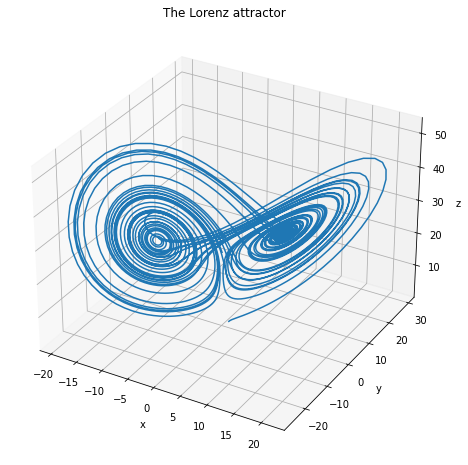

In [18]:
X0 = np.array([1, 1, 1])
t = 0
dt = 0.01
t_max = 50
Xi = X0

#integrates the Lorenz equations using Forward Euler method
X= lorenz_fe(t=t,t_max=t_max,Xi=Xi,dt=dt)[0]
time= lorenz_fe(t=t,t_max=t_max,Xi=Xi,dt=dt)[1]

x, y, z = X.T
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("The Lorenz attractor")

In [19]:
from scipy.integrate import solve_ivp

In [20]:
times = np.linspace(0, 50, 5001)  
X0= [1,1,1]
sol = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)

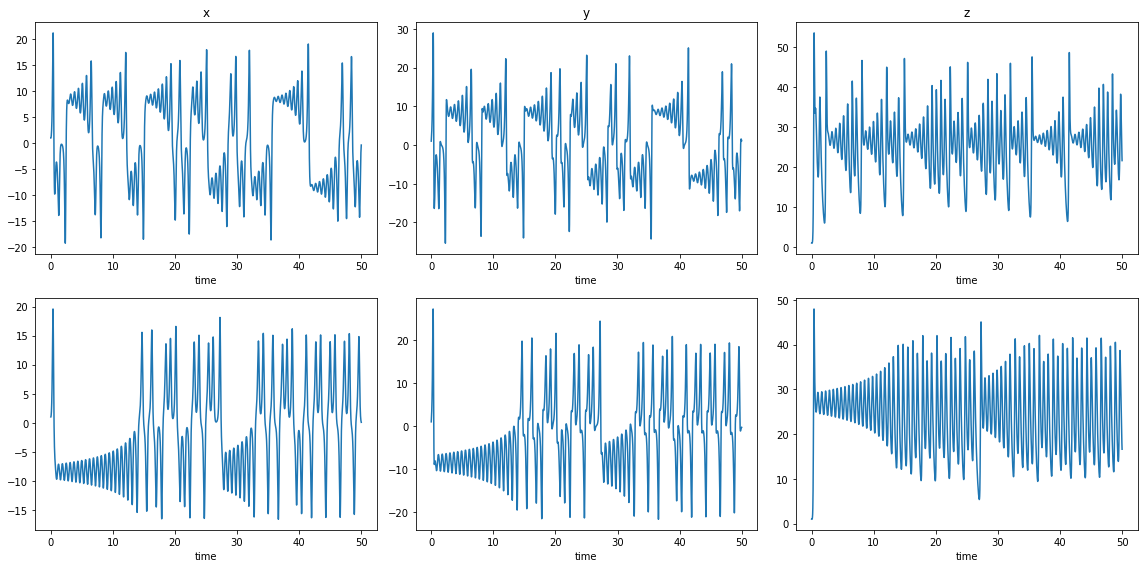

In [21]:
#comparing Forward Euler and Scipy.integrate
x1, y1, z1 = sol.y
fig, axs = plt.subplots(2, 3, figsize=(16, 8))  # produces 6 plots arranged in 2 rows of 3
axs[0, 0].plot(time, x) #Forward Euler
axs[0, 1].plot(time, y)
axs[0, 2].plot(time, z)
axs[1, 0].plot(times, x1) #Scipy.integrate
axs[1, 1].plot(times, y1)
axs[1, 2].plot(times, z1)
axs[0, 0].set_title('x')
axs[0, 1].set_title('y')
axs[0, 2].set_title('z')
for ax in axs.flat:
    ax.set(xlabel='time')
fig.tight_layout()

Text(0.5, 1.0, 'scipy.integrate.solve_ivp')

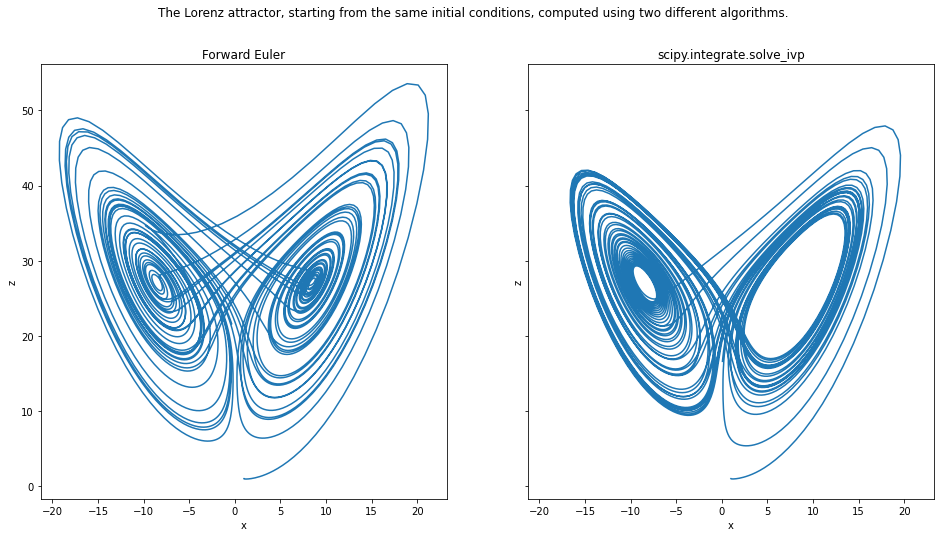

In [22]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
axs[0].plot(x, z)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[1].plot(x1, z1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
fig.suptitle("The Lorenz attractor, starting from the same initial conditions, computed using two different algorithms.")
axs[0].set_title("Forward Euler")
axs[1].set_title("scipy.integrate.solve_ivp")

compare results using the scipy solve_ivp function with different initial conditions.

Text(0.5, 1.0, 'Two trajectories for the Lorenz system')

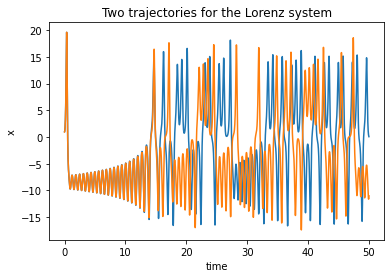

In [23]:
#analysing different initial conditions
X0 = np.array([0.95, 1., 1.])  # define a new initial condition
sol2 = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)  # save the solution to new variable, sol2
x2, y2, z2 = sol2.y
plt.plot(times, x1, times, x2)
plt.xlabel('time')
plt.ylabel('x')
plt.title("Two trajectories for the Lorenz system")

In [24]:
#calculating the seperation of results with different initial conditions
separation = np.linalg.norm(sol2.y-sol.y, axis=0)

Text(0.5, 1.0, 'Separation over time between two trajectories in the Lorenz system')

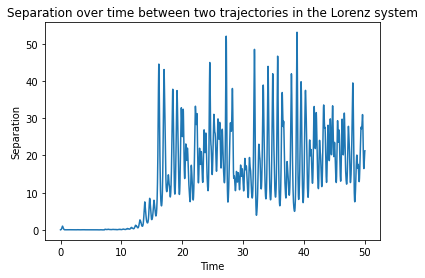

In [25]:
plt.plot(times, separation)
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Separation over time between two trajectories in the Lorenz system")

Using RK4 method calculate bred vectors to investigate predictability

In [26]:
# Define parameters 

# Initial condition for control simulation:
X0 = np.array([1, 1, 1])
# Perturbation - initial condition for perturbed simulation is X0 + Xp:
Xp = np.array((1, 1, 1))/(np.sqrt(3))
# Start time, timestep, end time and n:
t = 0.
dt = 0.01
max_t = 1000
n = 8

Xc=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[0]
Xper=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[1]
bred=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[2]
growth=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[3]
growth_time=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[4]
timesteps=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[5]


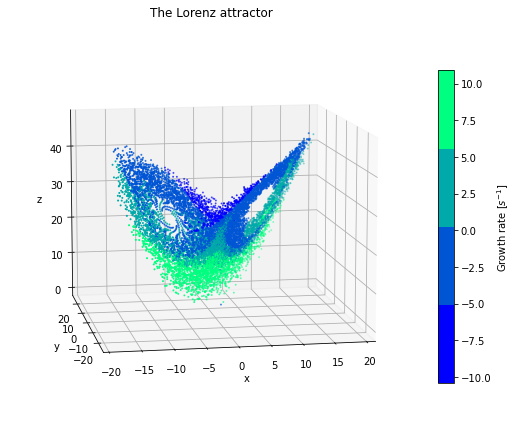

In [27]:
fig = plt.figure(figsize=(8, 8))
xc, yc, zc = Xc.T
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xc, yc, zc ,c=growth, cmap=plt.get_cmap('winter',4), s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
cbar = fig.colorbar(p, fraction =0.035)
cbar.set_label('Growth rate [$s^{-1}$]')
plt.title("The Lorenz attractor")
ax.view_init(elev=10, azim=260)

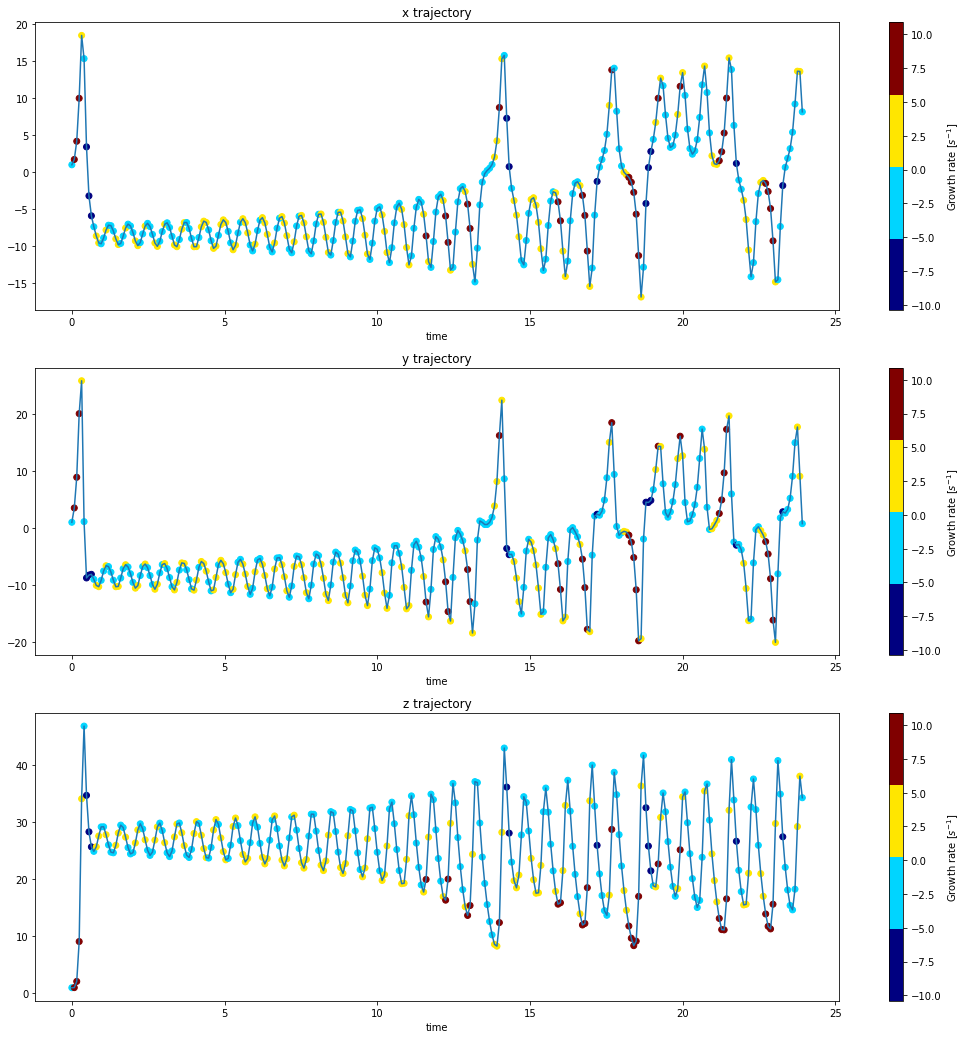

In [28]:
xc, yc, zc = Xc[0:300].T
fig1 ,axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))
cols= [xc,yc,zc]
title=['x trajectory', 'y trajectory','z trajectory']

for  i, ax, k in zip(cols, axes, title):
    ax.plot(growth_time[0:300], i)
    p= ax.scatter(growth_time[0:300], i, c=growth[0:300], label ='growth rate' , cmap=plt.get_cmap('jet',4))
    cbar = plt.colorbar(p,ax=ax)
    cbar.set_label('Growth rate [$s^{-1}$]')
    ax.set_title(k)
    ax.set_xlabel('time')
    